In [1]:
pip install fanalysis

     |████████████████████████████████| 61kB 4.7MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib
import pandas as pd
from fanalysis.ca import CA
df = pd.read_csv("clean_df.csv")
df=df[["Rating","Niveau"]]
X=pd.crosstab(df["Rating"],df["Niveau"])
print(X)
X=X.values

Niveau  Bon  Excellent  Mediocre
Rating                          
G        23          1        99
None      1          0         7
PG        7          2        46
PG-13   260         32       714
R        80         15       218


In [3]:
my_ca = CA(row_labels=["G","None","PG","PG-13","R"], col_labels=["Bon","Excellent","Mediocre"])

In [4]:
my_ca.fit(X)

CA(col_labels=['Bon', 'Excellent', 'Mediocre'], n_components=None,
  row_labels=['G', 'None', 'PG', 'PG-13', 'R'], stats=True)

In [5]:
print(my_ca.eig_)
#valeurs propres

[[7.17412108e-03 1.95092373e-03]
 [7.86201189e+01 2.13798811e+01]
 [7.86201189e+01 1.00000000e+02]]


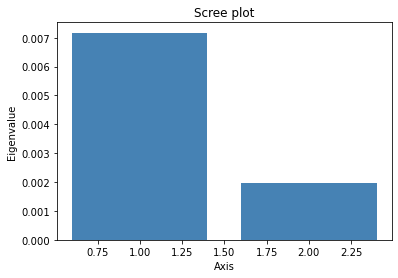

In [6]:
my_ca.plot_eigenvalues()

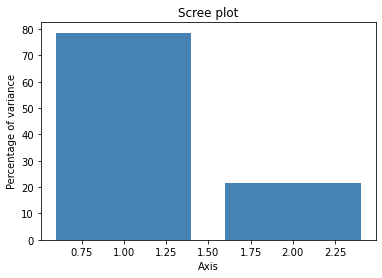

In [7]:
my_ca.plot_eigenvalues(type="percentage")
#valeur propre expliquée

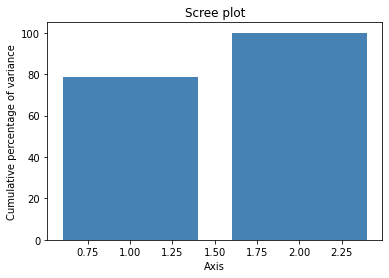

In [8]:
my_ca.plot_eigenvalues(type="cumulative")

In [9]:
df_rows = my_ca.row_topandas()
print(df_rows)

       row_coord_dim1  row_coord_dim2  row_contrib_dim1  row_contrib_dim2  \
G           -0.203018        0.045236         46.953644          8.572275   
None        -0.355318        0.010444          9.354481          0.029719   
PG          -0.231249       -0.152351         27.240707         43.478466   
PG-13        0.019541        0.020252          3.557920         14.052837   
R            0.066690       -0.056364         12.893248         33.866703   

       row_cos2_dim1  row_cos2_dim2  
G           0.952701       0.047299  
None        0.999137       0.000863  
PG          0.697332       0.302668  
PG-13       0.482140       0.517860  
R           0.583328       0.416672  


In [10]:
# Coordonnées des points lignes
print(my_ca.row_coord_)

[[-0.20301807  0.04523597]
 [-0.35531821  0.01044387]
 [-0.23124931 -0.1523506 ]
 [ 0.01954122  0.02025216]
 [ 0.06669013 -0.05636411]]


In [11]:
# Contributions des points lignes
print(my_ca.row_contrib_)

[[4.69536444e+01 8.57227499e+00]
 [9.35448125e+00 2.97191546e-02]
 [2.72407068e+01 4.34784658e+01]
 [3.55791993e+00 1.40528367e+01]
 [1.28932476e+01 3.38667034e+01]]


In [12]:
# Cos2 des points lignes
print(my_ca.row_cos2_)

[[9.52700685e-01 4.72993153e-02]
 [9.99136796e-01 8.63203685e-04]
 [6.97331749e-01 3.02668251e-01]
 [4.82139875e-01 5.17860125e-01]
 [5.83327611e-01 4.16672389e-01]]


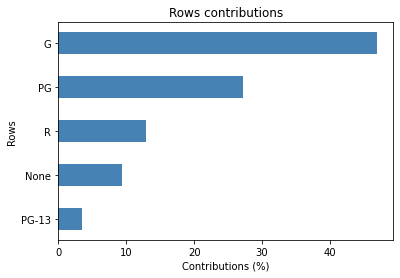

In [13]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_ca.plot_row_contrib(num_axis=1)

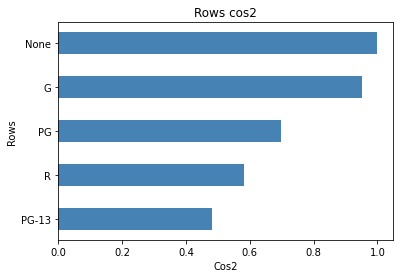

In [14]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
#La modalité PG-13 est mal représentée on peut donc la négliger dans l'interprétation de l'axe
#La modalité None est mal représentée et ne contribue pas grandement à la formation de l'axe elle est donc inutile dans l'analyse
my_ca.plot_row_cos2(num_axis=1)

In [15]:
df_cols = my_ca.col_topandas()
print(df_cols)

           col_coord_dim1  col_coord_dim2  col_contrib_dim1  col_contrib_dim2  \
Bon              0.120051        0.045210         49.522093         25.826745   
Excellent        0.226718       -0.206867         23.803359         72.874382   
Mediocre        -0.051545       -0.005931         26.674548          1.298874   

           col_cos2_dim1  col_cos2_dim2  
Bon             0.875794       0.124206  
Excellent       0.545689       0.454311  
Mediocre        0.986931       0.013069  


In [16]:
# Coordonnées des points colonnes
print(my_ca.col_coord_)

[[ 0.12005082  0.04521018]
 [ 0.22671838 -0.20686682]
 [-0.05154499 -0.0059314 ]]


In [17]:
# Contributions des points colonnes
print(my_ca.col_contrib_)

[[49.52209264 25.82674457]
 [23.80335901 72.87438186]
 [26.67454835  1.29887357]]


In [18]:
# Cos2 des points colonnes
print(my_ca.col_cos2_)

[[0.87579358 0.12420642]
 [0.5456889  0.4543111 ]
 [0.98693142 0.01306858]]


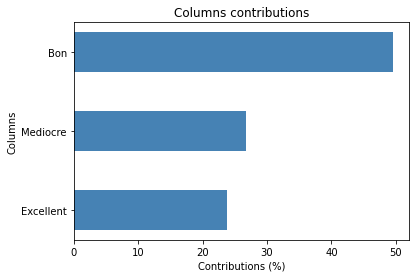

In [19]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
#Il est difficile d'interpréter la modalité "Excellent"
#Car elle ne contribue pas beaucoup à la formation de l'axe et n'a pas de qualité de représentation assez importante pour être analysée 
my_ca.plot_col_contrib(num_axis=1)

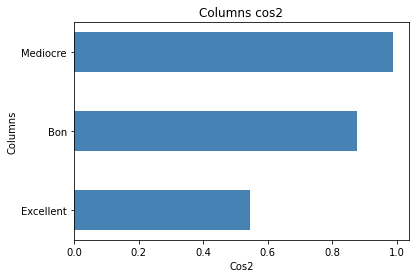

In [20]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
#On observe que la qualité de représentation dépend de la proportion de chaque niveau
#Puisqu'il y a plus d'oeuvres médiocres que d'excellentes
my_ca.plot_col_cos2(num_axis=1)

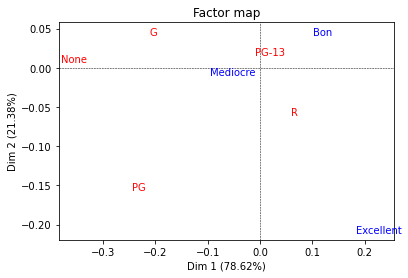

In [21]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_ca.mapping(num_x_axis=1, num_y_axis=2)

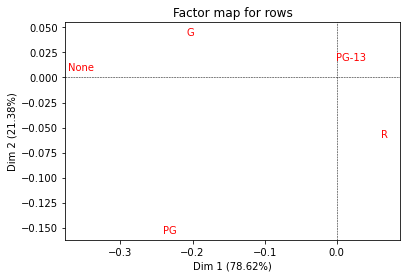

In [22]:
# Mapping des points lignes
my_ca.mapping_row(num_x_axis=1, num_y_axis=2)

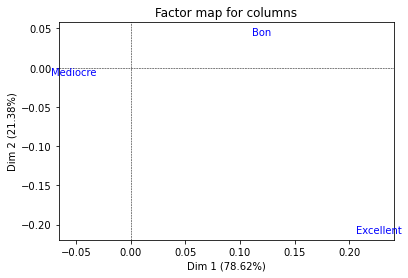

In [23]:
# Mapping des points colonnes
my_ca.mapping_col(num_x_axis=1, num_y_axis=2)

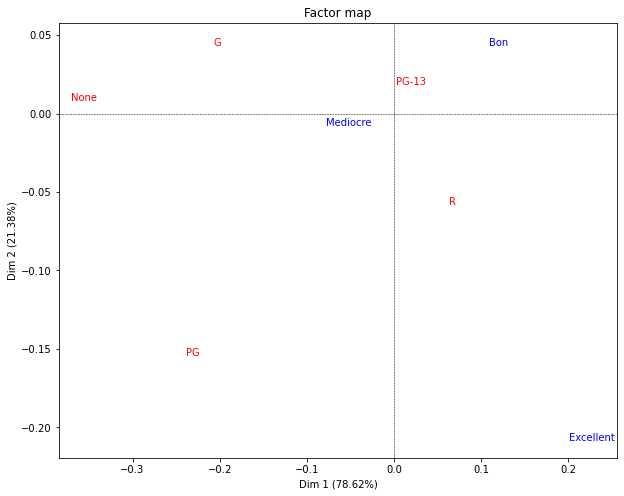

In [24]:
my_ca.mapping(1, 2, figsize=(10, 8))

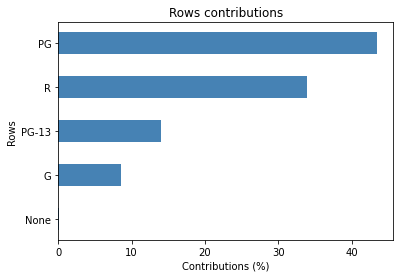

In [25]:
#analyse du second axe
my_ca.plot_row_contrib(num_axis=2)
#Les contributions suivent un ordre décroissant en terme de violence
#la seule exception est "PG"

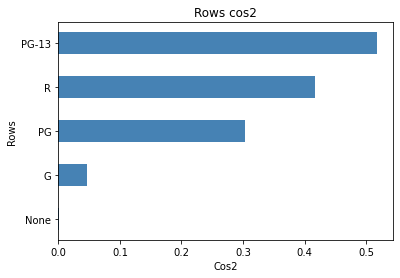

In [26]:
my_ca.plot_row_cos2(num_axis=2)
#Même ordre que pour les contributions

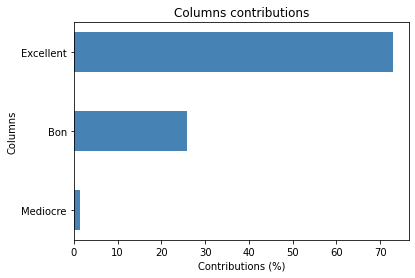

In [27]:
my_ca.plot_col_contrib(num_axis=2)
#Le graphique suit l'ordre de notation (du pire au meilleur)

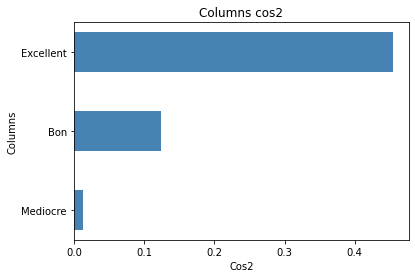

In [28]:
my_ca.plot_col_cos2(num_axis=2)
#la qualité de représentation suit le même ordre que la contribution
#donc l'axe des abcisses représente clairement les notes